In [27]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches


# Carga de datos
### Carga de datos de las estaciones

In [4]:
##Carga de parametros
path = 'raw_data/'

#Lectura de estaciones
columns =['Estación','VelViento','DirViento','PM10','Pm2.5']
data_estaciones = pd.read_csv(path + 'estaciones.txt',header=None, names=columns)
data_estaciones

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/estaciones.txt'

### Carga de datos de polución

In [15]:
df_PM10_Bol = pd.read_excel('raw_data/Bolivia_PM10_22-01-2024.xlsx')
df_PM10_Bol

,Bolivia,Unnamed: 1
0,fecha hora,PM10
1,NaN,µg/m3
2,22-01-2024 01:00,25
3,22-01-2024 02:00,38
4,22-01-2024 03:00,35
5,22-01-2024 04:00,25
6,22-01-2024 05:00,22
7,22-01-2024 06:00,24
8,22-01-2024 07:00,38
9,22-01-2024 08:00,32


### Limpieza de datos

In [16]:
df_PM10_Bol.isnull().sum()

Bolivia       1
Unnamed: 1    0
dtype: int64

#### Relleno de los NaNs

In [7]:

# Rellenar los valores NaN con el valor anterior en la columna
df_PM10_Bol['column'] = df_PM10_Bol['column'].fillna(method='ffill')




KeyError: 'PM10'

### Analisis de datos

In [ ]:
#Lectura de datos por dia

#Lectura de datos por hora
data = 


NameError: name 'data' is not defined

#### Interpolación de datos

### Visualizacion de datos

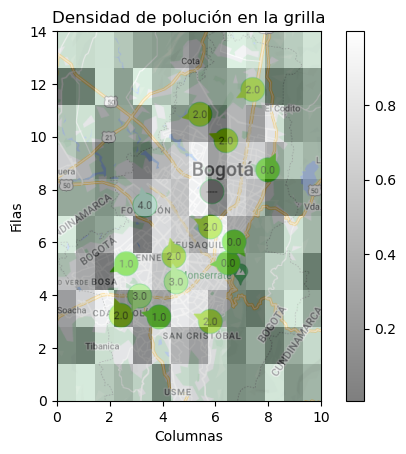

In [34]:

#@title Visualización de la grilla
def Mapa(data):
    # Cargar la imagen de fondo
    background_image = mpimg.imread('../Map.png')




    # Crear el plot
    fig, ax = plt.subplots()

    # Mostrar la imagen de fondo
    ax.imshow(background_image, extent=[0, Lx, 0, Ly], aspect='auto')

    # Mostrar la grilla coloreada sobre la imagen de fondo
    # Ajustar alpha para hacer la grilla transparente
    cax = ax.imshow(data, cmap='gray', interpolation='nearest', extent=[0, Lx, 0, Ly], alpha=0.5)


    # Agregar una barra de colores para referencia
    plt.colorbar(cax)

    # Configurar etiquetas y título (opcional)
    plt.title('Densidad de polución en la grilla')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')

    # Mostrar el plot
    plt.show()

Lx = 10
Ly = 14
# Crear una matriz de (Lx)x(Ly) con valores aleatorios entre 0 y 1
data = np.random.rand(Lx, Ly)
Mapa(data)

In [25]:
image_path = '../Map.png'
image = cv2.imread(image_path)
print(image)

[[[198 226 187]
  [198 226 187]
  [198 226 187]
  ...
  [198 226 187]
  [198 226 187]
  [198 226 187]]

 [[198 226 187]
  [198 226 187]
  [198 226 187]
  ...
  [198 226 187]
  [198 226 187]
  [198 226 187]]

 [[198 226 187]
  [198 226 187]
  [198 226 187]
  ...
  [198 226 187]
  [198 226 187]
  [198 226 187]]

 ...

 [[198 226 187]
  [198 226 187]
  [198 226 187]
  ...
  [198 226 187]
  [198 226 187]
  [198 226 187]]

 [[198 226 187]
  [198 226 187]
  [198 226 187]
  ...
  [198 226 187]
  [198 226 187]
  [198 226 187]]

 [[198 226 187]
  [198 226 187]
  [198 226 187]
  ...
  [198 226 187]
  [198 226 187]
  [198 226 187]]]


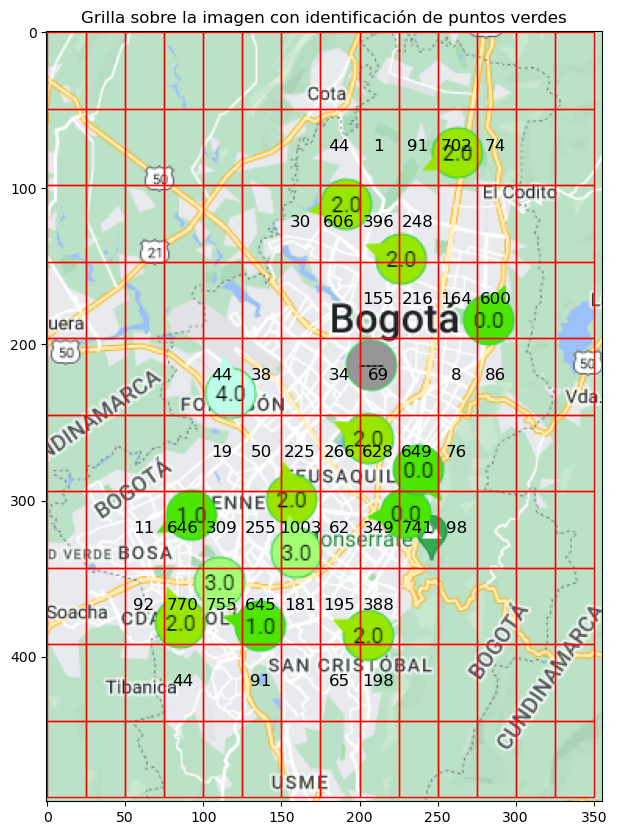

In [35]:
# Posicionar las estaciones en la grilla de manera automatica
# Cargar la imagen
image_path = '../Map.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir el tamaño de la grilla
grid_size = (Lx, Ly)  # 10 filas y 14 columnas

# Dimensiones de la imagen
height, width, _ = image.shape

# Tamaño de cada celda de la grilla
cell_height = height // grid_size[0]
cell_width = width // grid_size[1]

# Crear una figura para visualizar la imagen y la grilla
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Identificar puntos verdes y superponer la grilla
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Coordenadas (nodos) de la celda actual
        start_x = j * cell_width
        start_y = i * cell_height
        end_x = (j + 1) * cell_width
        end_y = (i + 1) * cell_height

        # Extraer la celda de la imagen
        cell = image[start_y:end_y, start_x:end_x]

        # Convertir la celda a espacio de color HSV para identificar el color verde
        cell_hsv = cv2.cvtColor(cell, cv2.COLOR_BGR2HSV)
        
        # Definir el rango de color verde en HSV
        lower_green = np.array([35, 100, 100])
        upper_green = np.array([85, 255, 255])
        
        # Crear una máscara para los píxeles verdes
        mask = cv2.inRange(cell_hsv, lower_green, upper_green)
        
        # Contar los píxeles verdes en la celda
        green_count = cv2.countNonZero(mask)

        # Superponer la grilla
        rect = patches.Rectangle((start_x, start_y), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Si se detectan píxeles verdes, marcar la celda
        if green_count > 0:
            plt.text(start_x + cell_width // 2, start_y + cell_height // 2, f'{green_count}', color='black', fontsize=12, ha='center', va='center')

plt.title('Grilla sobre la imagen con identificación de puntos verdes')
plt.show()


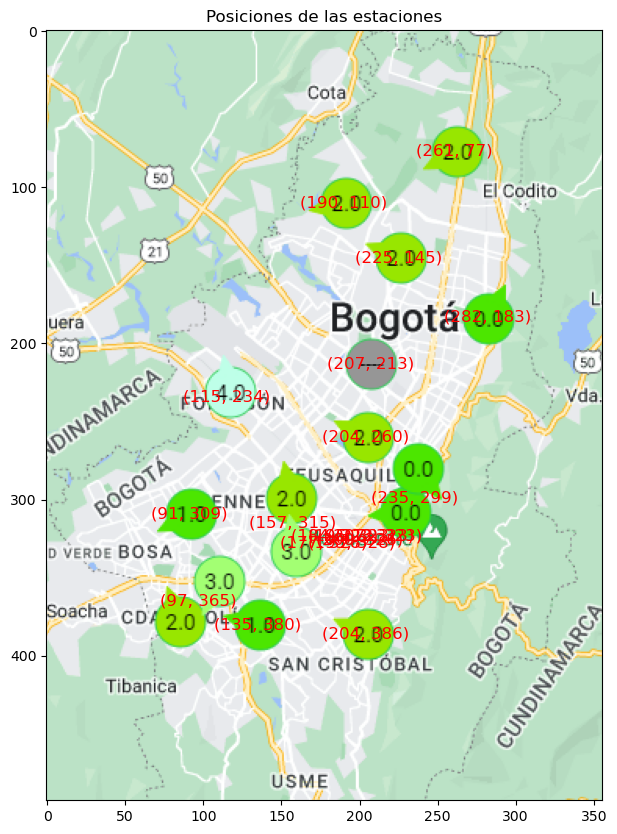

Estación en posición: (204, 386)
Estación en posición: (135, 380)
Estación en posición: (97, 365)
Estación en posición: (195, 328)
Estación en posición: (212, 323)
Estación en posición: (207, 323)
Estación en posición: (200, 326)
Estación en posición: (195, 323)
Estación en posición: (184, 323)
Estación en posición: (177, 328)
Estación en posición: (91, 309)
Estación en posición: (157, 315)
Estación en posición: (235, 299)
Estación en posición: (204, 260)
Estación en posición: (115, 234)
Estación en posición: (207, 213)
Estación en posición: (282, 183)
Estación en posición: (225, 145)
Estación en posición: (190, 110)
Estación en posición: (261, 77)


In [30]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen a espacio de color HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir el rango de color verde en HSV
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Crear una máscara para los píxeles verdes
mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Encontrar los contornos de las regiones verdes
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una figura para visualizar la imagen y las posiciones de las estaciones
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Lista para almacenar las posiciones de las estaciones
stations_positions = []

# Dibujar los contornos y encontrar las posiciones de las estaciones
for contour in contours:
    # Obtener el centro del contorno
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        stations_positions.append((cx, cy))
        # Dibujar un círculo en el centro del contorno
        cv2.circle(image_rgb, (cx, cy), 5, (255, 0, 0), -1)
        # Anotar la posición en la imagen
        plt.text(cx, cy, f'({cx}, {cy})', color='red', fontsize=12, ha='center', va='center')

# Mostrar la imagen con las posiciones de las estaciones
plt.title('Posiciones de las estaciones')
plt.show()

# Imprimir las posiciones de las estaciones
for pos in stations_positions:
    print(f'Estación en posición: {pos}')

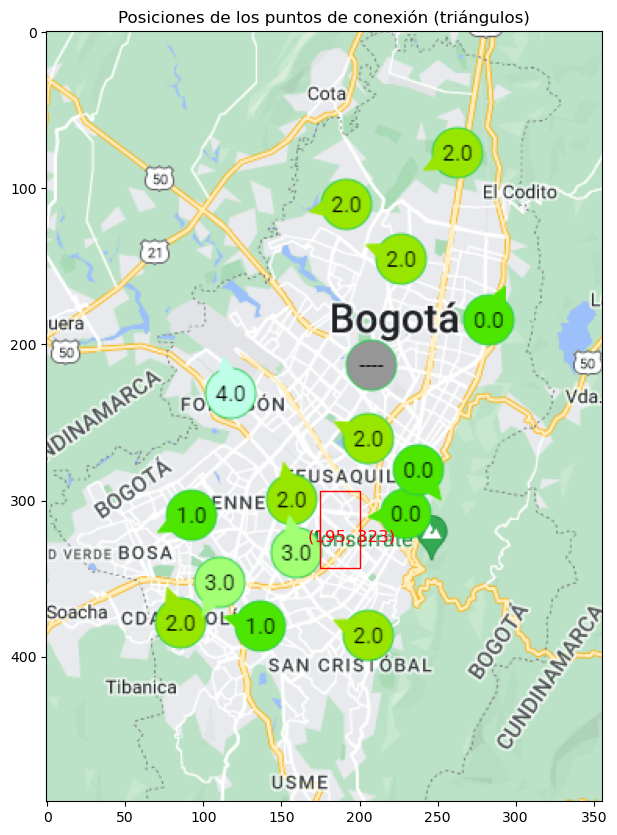

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Cargar la imagen
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen a espacio de color HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir el rango de color verde en HSV
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Crear una máscara para los píxeles verdes
mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Encontrar los contornos de las regiones verdes
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dimensiones de la imagen
height, width, _ = image.shape

# Definir el tamaño de la grilla
grid_size = (Lx,Ly)  # 10 filas y 14 columnas

# Tamaño de cada celda de la grilla
cell_height = height // grid_size[0]
cell_width = width // grid_size[1]

# Crear una figura para visualizar la imagen y la grilla
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Función para detectar triángulos en los contornos
def detect_triangle(contour):
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return len(approx) == 3

# Dibujar los contornos y encontrar las posiciones de los triángulos
for contour in contours:
    if detect_triangle(contour):
        # Obtener el centro del contorno
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            # Dibujar un círculo en el centro del contorno
            cv2.circle(image_rgb, (cx, cy), 5, (255, 0, 0), -1)
            # Anotar la posición en la imagen
            plt.text(cx, cy, f'({cx}, {cy})', color='red', fontsize=12, ha='center', va='center')

            # Determinar en qué celda de la grilla se encuentra el triángulo
            cell_x = cx // cell_width
            cell_y = cy // cell_height
            # Dibujar un rectángulo en la celda correspondiente
            rect = patches.Rectangle((cell_x * cell_width, cell_y * cell_height), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

# Mostrar la imagen con las posiciones de los triángulos y la grilla
plt.title('Posiciones de los puntos de conexión (triángulos)')
plt.show()


Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6
Centro del triangulo 7 6


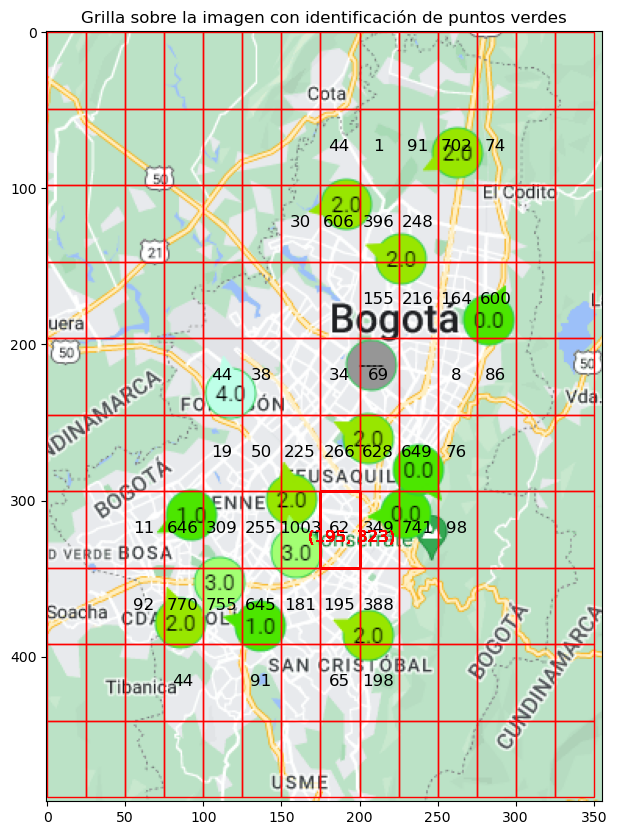

In [43]:
# Posicionar las estaciones en la grilla de manera automatica
# Cargar la imagen
image_path = '../Map.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir el tamaño de la grilla
grid_size = (Lx, Ly)  # 10 filas y 14 columnas

# Dimensiones de la imagen
height, width, _ = image.shape

# Tamaño de cada celda de la grilla
cell_height = height // grid_size[0]
cell_width = width // grid_size[1]

# Crear una figura para visualizar la imagen y la grilla
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Identificar puntos verdes y superponer la grilla
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Coordenadas (nodos) de la celda actual
        start_x = j * cell_width
        start_y = i * cell_height
        end_x = (j + 1) * cell_width
        end_y = (i + 1) * cell_height

        # Extraer la celda de la imagen
        cell = image[start_y:end_y, start_x:end_x]

        # Convertir la celda a espacio de color HSV para identificar el color verde
        cell_hsv = cv2.cvtColor(cell, cv2.COLOR_BGR2HSV)
        
        # Definir el rango de color verde en HSV
        lower_green = np.array([35, 100, 100])
        upper_green = np.array([85, 255, 255])
        
        # Crear una máscara para los píxeles verdes
        mask = cv2.inRange(cell_hsv, lower_green, upper_green)
        
        # Contar los píxeles verdes en la celda
        green_count = cv2.countNonZero(mask)
 

        # Si se detectan píxeles verdes, marcar la celda
        if green_count > 0:
            plt.text(start_x + cell_width // 2, start_y + cell_height // 2, f'{green_count}', color='black', fontsize=12, ha='center', va='center')
            # Dibujar los contornos y encontrar las posiciones de los triángulos
            for contour in contours:
                if detect_triangle(contour):
                    # Obtener el centro del contorno
                    M = cv2.moments(contour)
                    if M['m00'] != 0:
                        cx = int(M['m10'] / M['m00'])
                        cy = int(M['m01'] / M['m00'])
                        print("Centro del triangulo",cx//cell_width,cy//cell_height)
                        # Dibujar un círculo en el centro del contorno
                        cv2.circle(image_rgb, (cx, cy), 5, (255, 0, 0), -1)
                        # Anotar la posición en la imagen
                        plt.text(cx, cy, f'({cx}, {cy})', color='red', fontsize=12, ha='center', va='center')

                        # Determinar en qué celda de la grilla se encuentra el triángulo
                        cell_x = cx // cell_width
                        cell_y = cy // cell_height
                        # Dibujar un rectángulo en la celda correspondiente
                        rect = patches.Rectangle((cell_x * cell_width, cell_y * cell_height), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none')
                        ax.add_patch(rect)
        # Superponer la grilla
        rect = patches.Rectangle((start_x, start_y), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.title('Grilla sobre la imagen con identificación de puntos verdes')
plt.show()
